In [76]:
""" 
Imports
"""

import pandas as pd

In [79]:
import pandas as pd

# Generating sample file names based on the provided pattern
path = '../../crimes_brasil/'
file_names = [f"BO_{year}_{part}.csv" for year in range(2007, 2014) for part in range(1, 3)]
file_names += ["BO_2015.csv",'BO_2016.csv']

# Creating a function to load, sample, and save the data
def load_and_sample_files(file_names,path, sample_fraction=0.05):
    sampled_dfs = []
    for file in file_names:
        print(file)
        try:
            df = pd.read_csv(path+file,low_memory=False)
            
            sampled_df = df.sample(frac=sample_fraction, random_state=1)
            sampled_dfs.append(sampled_df)
        except FileNotFoundError:
            print(f"File {file} not found.")
    return pd.concat(sampled_dfs, ignore_index=True)

# Assuming the files are in the current working directory
sampled_data = load_and_sample_files(file_names,path)

sampled_data.count()


BO_2007_1.csv
BO_2007_2.csv
BO_2008_1.csv
BO_2008_2.csv
BO_2009_1.csv
BO_2009_2.csv
BO_2010_1.csv
BO_2010_2.csv
BO_2011_1.csv
BO_2011_2.csv
BO_2012_1.csv
BO_2012_2.csv
BO_2013_1.csv
BO_2013_2.csv
BO_2015.csv
BO_2016.csv


NUM_BO                    643429
ANO_BO                    643429
ID_DELEGACIA              643429
NOME_DEPARTAMENTO         643429
NOME_SECCIONAL            643429
DELEGACIA                 643429
NOME_DEPARTAMENTO_CIRC    643429
NOME_SECCIONAL_CIRC       643429
NOME_DELEGACIA_CIRC       643429
ANO                       643429
MES                       643429
DATA_OCORRENCIA_BO        562848
HORA_OCORRENCIA_BO        470462
FLAG_STATUS               643429
RUBRICA                   643429
DESDOBRAMENTO              30310
CONDUTA                   472915
LATITUDE                  343690
LONGITUDE                 343690
CIDADE                    643429
LOGRADOURO                643425
NUMERO_LOGRADOURO         611230
FLAG_STATUS.1             643426
DESCR_TIPO_PESSOA         565555
CONT_PESSOA               565554
SEXO_PESSOA               565555
IDADE_PESSOA              402309
COR                       413534
DESCR_PROFISSAO           318418
DESCR_GRAU_INSTRUCAO      322032
Unnamed: 3

In [80]:
sampled_data = sampled_data.loc[:, ~sampled_data.columns.str.contains('^Unnamed')]
sampled_data.dropna()
sampled_data['IDADE_PESSOA'] = pd.to_numeric(sampled_data['IDADE_PESSOA'].str.extract('(\d+)')[0], errors='coerce')
# Save the sampled data into a new CSV file
output_file = "sampled_crime_reports.csv"
sampled_data['DATA_OCORRENCIA_BO'] = pd.to_datetime(sampled_data['DATA_OCORRENCIA_BO'], errors='coerce').dropna()
sampled_data.to_csv(output_file, index=False)
output_file

C:\Users\garcez\AppData\Local\Temp\ipykernel_21804\1294222011.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sampled_data['DATA_OCORRENCIA_BO'] = pd.to_datetime(sampled_data['DATA_OCORRENCIA_BO'], errors='coerce').dropna()


'sampled_crime_reports.csv'

In [85]:
sampled_data['CIDADE'].value_counts().head(20)

CIDADE
S.PAULO                                     386646
SÃO PAULO                                    33721
GUARULHOS                                    28946
S.BERNARDO DO CAMPO                          22535
S.ANDRE                                      21012
OSASCO                                       19925
DIADEMA                                      13349
MAUA                                          9033
CARAPICUIBA                                   7728
MOGI DAS CRUZES                               7707
TABOAO DA SERRA                               7308
BARUERI                                       6408
SUZANO                                        6081
ITAQUAQUECETUBA                               5653
COTIA                                         5300
EMBU                                          4894
S.CAETANO DO SUL                              4701
São Paulo                                     3905
ITAPEVI                                       3798
ITAPECERICA DA SERRA    

In [34]:
sampled_data.columns
[['DESCR_TIPO_PESSOA',
 'IDADE_PESSOA',
 'DESCR_GRAU_INSTRUCAO', 
 'RUBRICA', 
 'CIDADE',
 'SEXO_PESSOA',
 'COR',
 'DESCR_PROFISSAO',
'CONDUTA']]

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA',
       'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE', 'LONGITUDE', 'CIDADE',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1', 'DESCR_TIPO_PESSOA',
       'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR', 'DESCR_PROFISSAO',
       'DESCR_GRAU_INSTRUCAO'],
      dtype='object')

'sampled_crime_reports.csv'

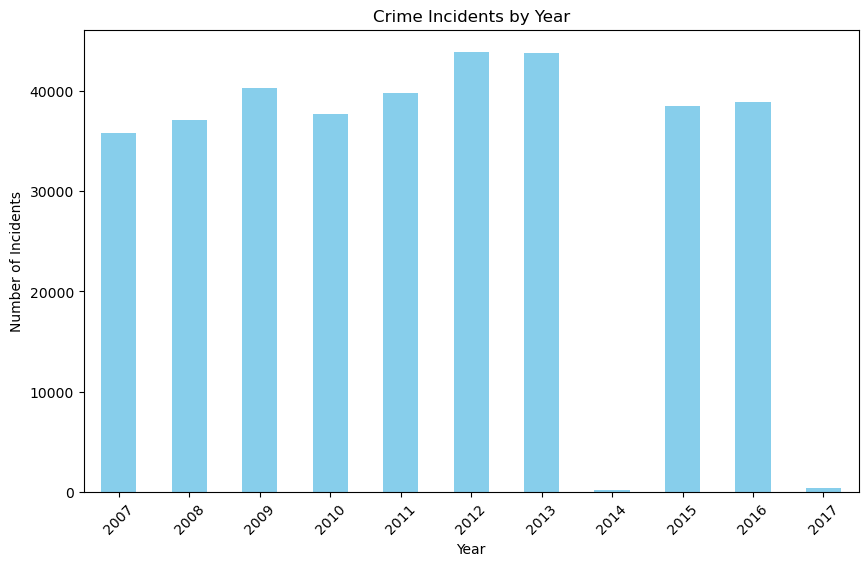

In [36]:
import matplotlib.pyplot as plt

def plot_crime_incidents_by_year(data):
    data['ANO_BO'] = data['ANO_BO'].astype(int)  # Ensure the year column is of type int
    incidents_by_year = data['ANO_BO'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    incidents_by_year.plot(kind='bar', color='skyblue')
    plt.title('Crime Incidents by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_incidents_by_year(sampled_data)


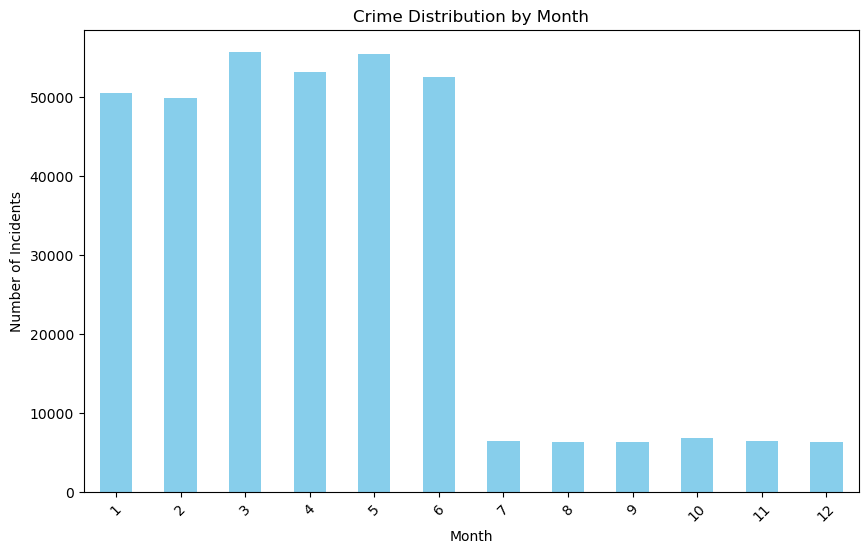

In [37]:
def plot_crime_distribution_by_month(data):
    data['MES'] = data['MES'].astype(int)  # Ensure the month column is of type int
    incidents_by_month = data['MES'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    incidents_by_month.plot(kind='bar', color='skyblue')
    plt.title('Crime Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_distribution_by_month(sampled_data)


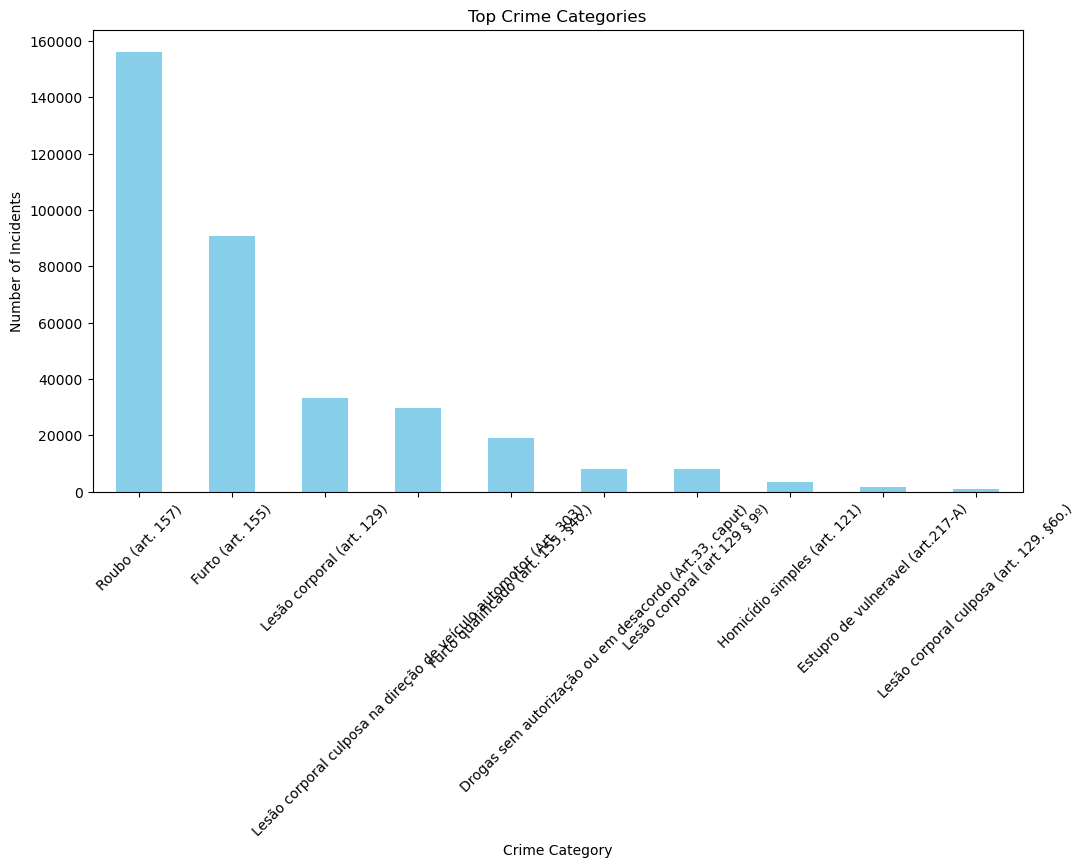

In [38]:
def plot_crime_categories(data, top_n=10):
    crime_categories = data['RUBRICA'].value_counts().head(top_n)

    plt.figure(figsize=(12, 6))
    crime_categories.plot(kind='bar', color='skyblue')
    plt.title('Top Crime Categories')
    plt.xlabel('Crime Category')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_categories(sampled_data)


In [41]:
sampled_data[['LATITUDE', 'LONGITUDE', 'ANO_BO', 'MES']].dropna()

,LATITUDE,LONGITUDE,ANO_BO,MES
10,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),2007,3
15,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),2007,1
21,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),2007,1
73,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),2007,1
172,Informação restrita (art. 31 da LAI),Informação restrita (art. 31 da LAI),2007,4
...,...,...,...,...
356591,-23.578709,-46.522184,2016,12
356594,-23.615023,-46.617397,2016,5
356595,-23.598358,-46.487426,2016,1
356596,-23.708643,-46.546221,2016,11


In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('sampled_crime_reports.csv').dropna()

# Define the columns for clustering
columns_for_clustering = ['DESCR_TIPO_PESSOA', 'IDADE_PESSOA', 'DESCR_GRAU_INSTRUCAO', 'RUBRICA', 
                          'CIDADE', 'SEXO_PESSOA', 'COR', 'DESCR_PROFISSAO', 'CONDUTA']

# Clean and preprocess the data
def clean_and_preprocess_data(data):
    # Select relevant columns and drop rows with NaN values
    data = data[['DESCR_TIPO_PESSOA',
        'IDADE_PESSOA',
        'DESCR_GRAU_INSTRUCAO', 
        'RUBRICA', 
        'CIDADE',
        'SEXO_PESSOA',
        'COR',
        'DESCR_PROFISSAO',
        'CONDUTA']]

    # Clean the 'IDADE_PESSOA' column
    data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'].str.extract('(\d+)')[0], errors='coerce')

    # Handle missing values by imputing
    imputer = SimpleImputer(strategy='most_frequent')
    data = pd.DataFrame(imputer.fit_transform(data), columns=columns_for_clustering)

    # Convert categorical columns to numeric using LabelEncoder
    label_encoders = {}
    for column in columns_for_clustering:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])
    
    return data, label_encoders

# Apply the cleaning and preprocessing
cleaned_data, label_encoders = clean_and_preprocess_data(df)

# Display the first few rows of the cleaned data
print(cleaned_data.head())


C:\Users\garcez\AppData\Local\Temp\ipykernel_21804\3873123414.py:6: DtypeWarning: Columns (11,12,17,18,21,23,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sampled_crime_reports.csv').dropna()


   DESCR_TIPO_PESSOA  IDADE_PESSOA  DESCR_GRAU_INSTRUCAO  RUBRICA  CIDADE  \
0                  9            16                     1        1      34   
1                 13            16                     2        1      31   
2                  5            16                     0        0      22   
3                  9            16                     2        0      31   
4                  9            16                     0        0      11   

   SEXO_PESSOA  COR  DESCR_PROFISSAO  CONDUTA  
0            2    3                9       12  
1            2    1               40       12  
2            2    1              238       12  
3            2    1              267       12  
4            2    4              111       12  


C:\Users\garcez\AppData\Local\Temp\ipykernel_21804\3873123414.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'].str.extract('(\d+)')[0], errors='coerce')


In [74]:
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the first few rows with the cluster labels
print(cleaned_data.head())


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


   DESCR_TIPO_PESSOA  IDADE_PESSOA  DESCR_GRAU_INSTRUCAO  RUBRICA  CIDADE  \
0                  9            16                     1        1      34   
1                 13            16                     2        1      31   
2                  5            16                     0        0      22   
3                  9            16                     2        0      31   
4                  9            16                     0        0      11   

   SEXO_PESSOA  COR  DESCR_PROFISSAO  CONDUTA  Cluster  
0            2    3                9       12        2  
1            2    1               40       12        1  
2            2    1              238       12        2  
3            2    1              267       12        2  
4            2    4              111       12        0  


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

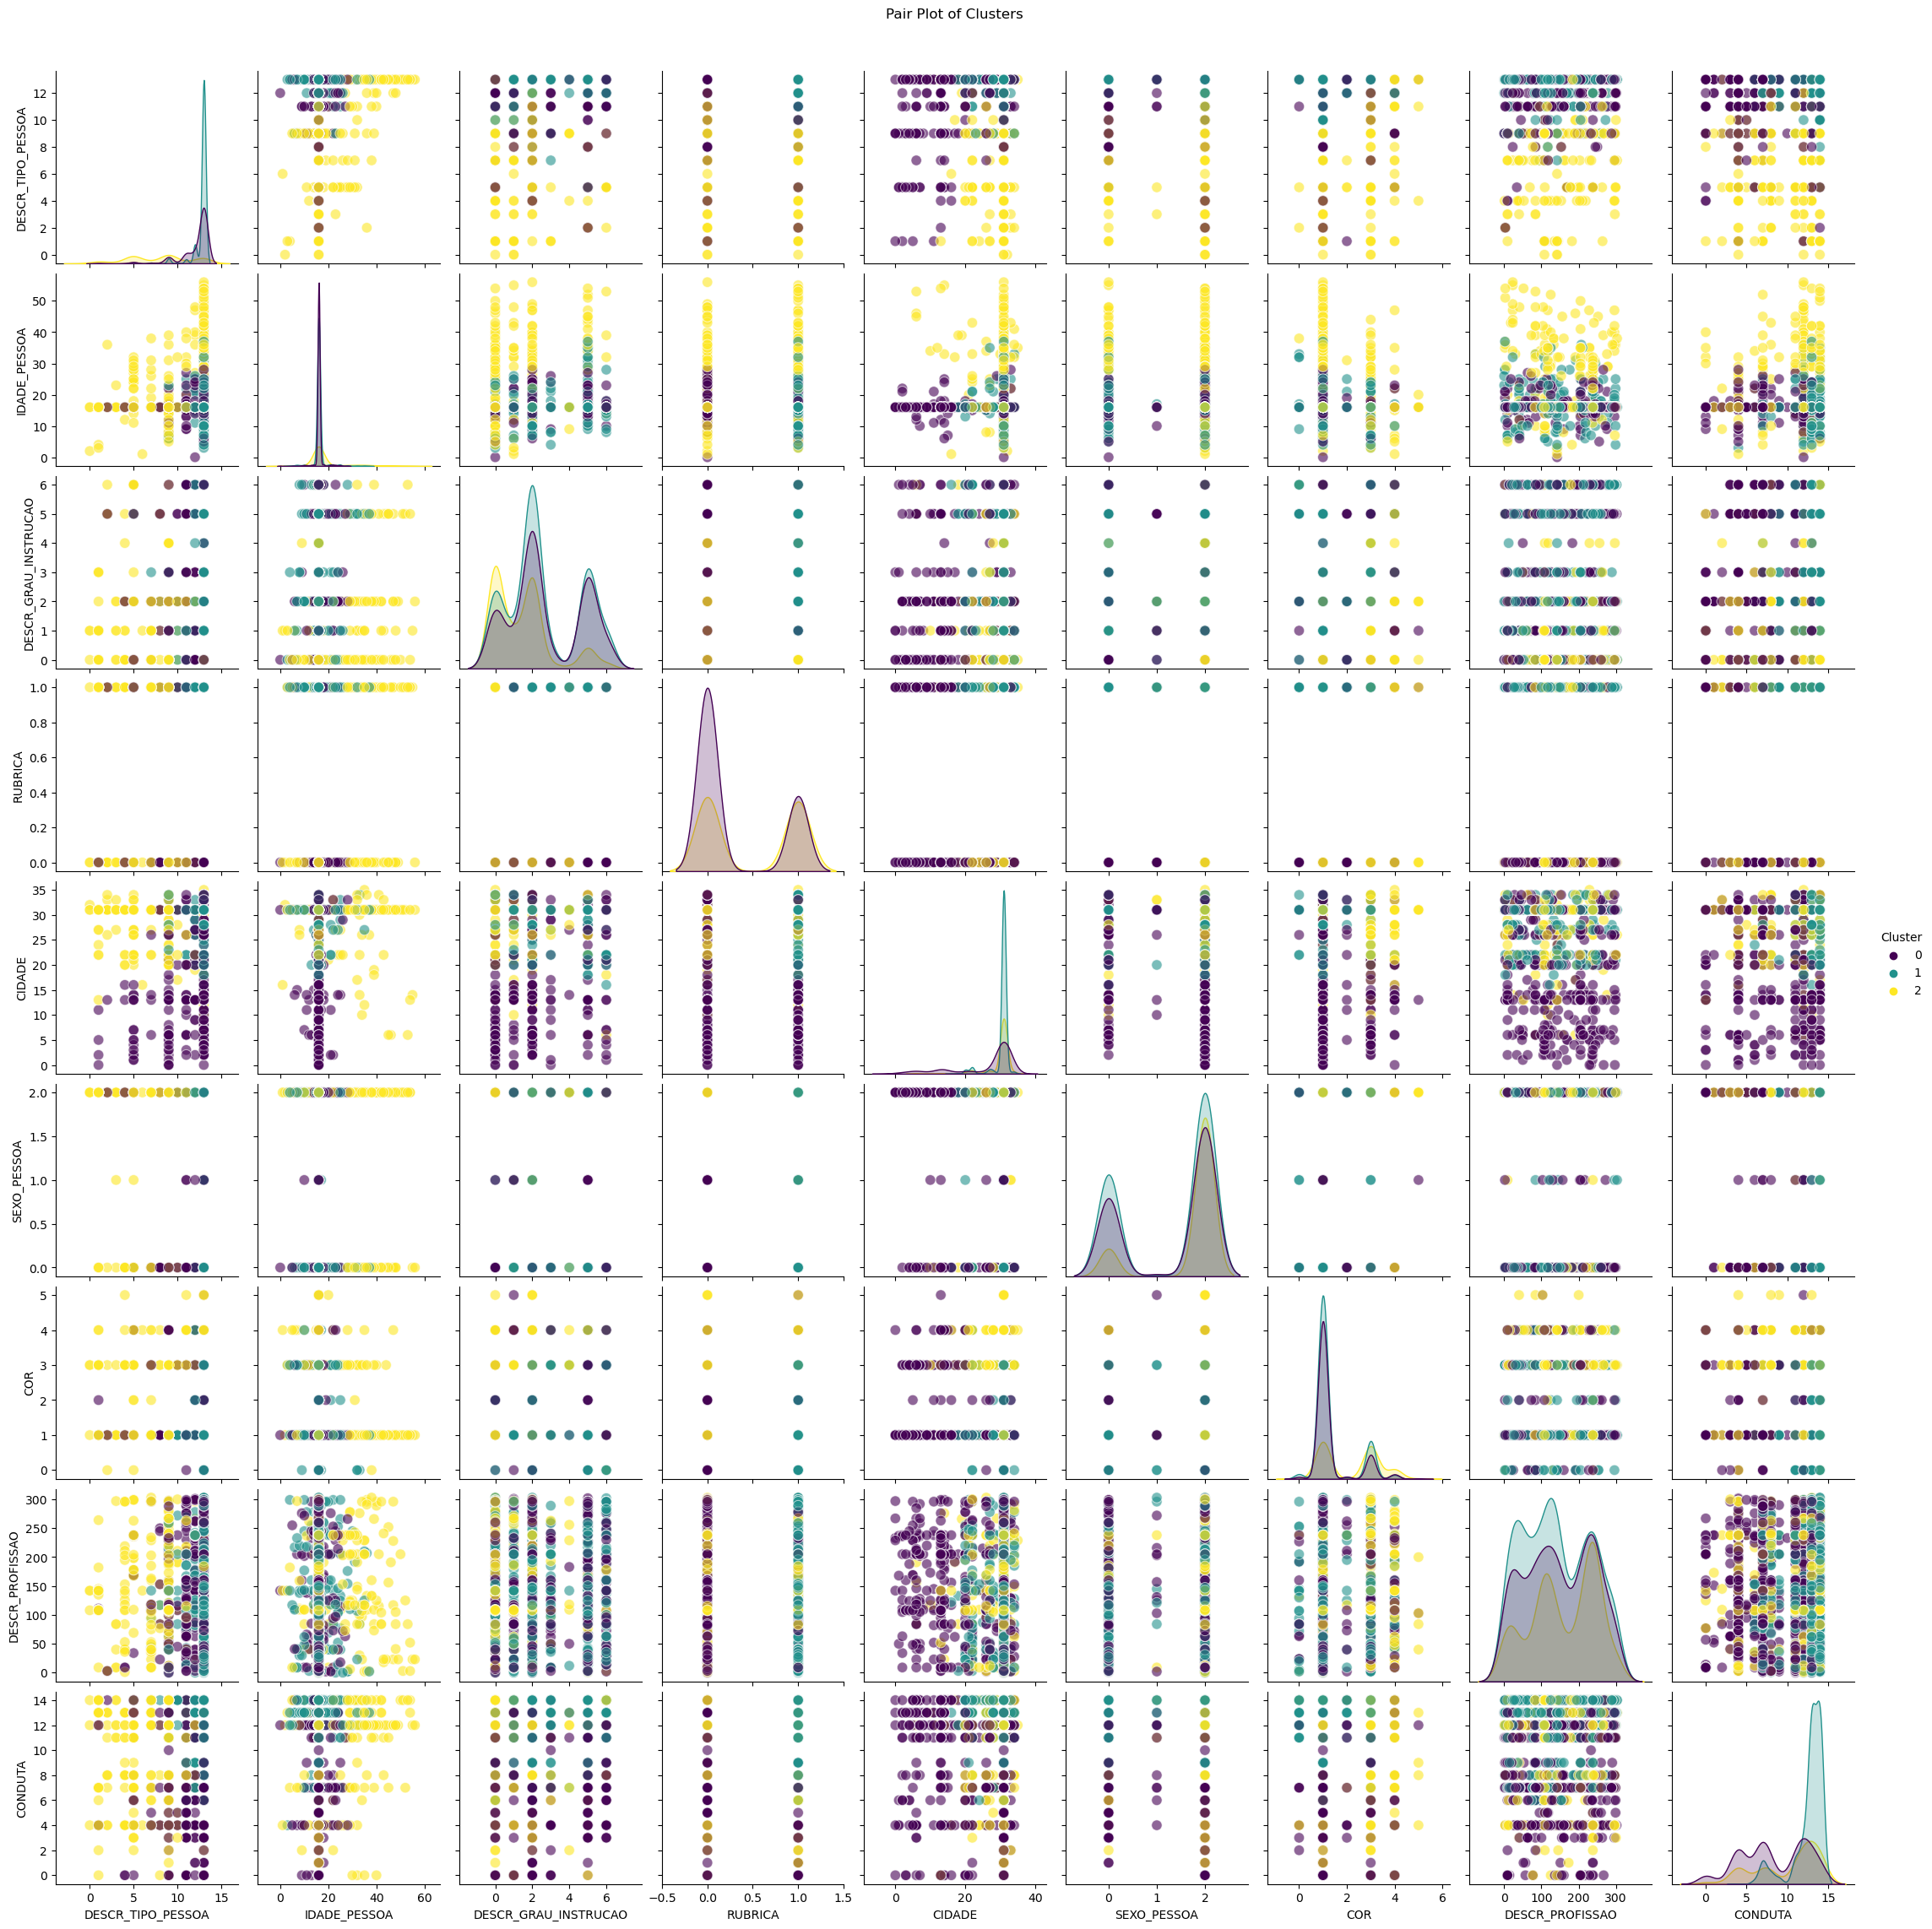

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pair plot of selected features colored by cluster
sns.pairplot(cleaned_data, vars=[
        'DESCR_TIPO_PESSOA',
        'IDADE_PESSOA',
        'DESCR_GRAU_INSTRUCAO', 
        'RUBRICA', 
        'CIDADE',
        'SEXO_PESSOA',
        'COR',
        'DESCR_PROFISSAO',
        'CONDUTA'
        ], hue='Cluster', palette='viridis', plot_kws={'alpha':0.6, 's':80})
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


In [64]:
# Add the cluster labels to the original dataset
df['Cluster'] = cleaned_data['Cluster']

# Analyze the characteristics of each cluster
def analyze_clusters(data, label_encoders):
    cluster_analysis = data.groupby('Cluster').mean()
    for column in label_encoders:
        cluster_analysis[column] = cluster_analysis[column].map(lambda x: label_encoders[column].inverse_transform([int(x)])[0])
    return cluster_analysis

# Perform the cluster analysis
cluster_analysis = analyze_clusters(cleaned_data, label_encoders)

# Display the cluster analysis
print(cluster_analysis)


            DESCR_TIPO_PESSOA  IDADE_PESSOA  \
Cluster                                       
0        Testemunha                    51.0   
1        Curador                       29.0   
2        Testemunha                    29.0   
3        Testemunha                    29.0   
4        Representante                 28.0   

                             DESCR_GRAU_INSTRUCAO  \
Cluster                                             
0        2 Grau completo                            
1        1 Grau incompleto                          
2        2 Grau completo                            
3        2 Grau incompleto                          
4        1 Grau incompleto                          

                                    RUBRICA  \
Cluster                                       
0        Furto qualificado (art. 155, §4o.)   
1        Furto qualificado (art. 155, §4o.)   
2                          Roubo (art. 157)   
3        Furto qualificado (art. 155, §4o.)   
4        Furto q

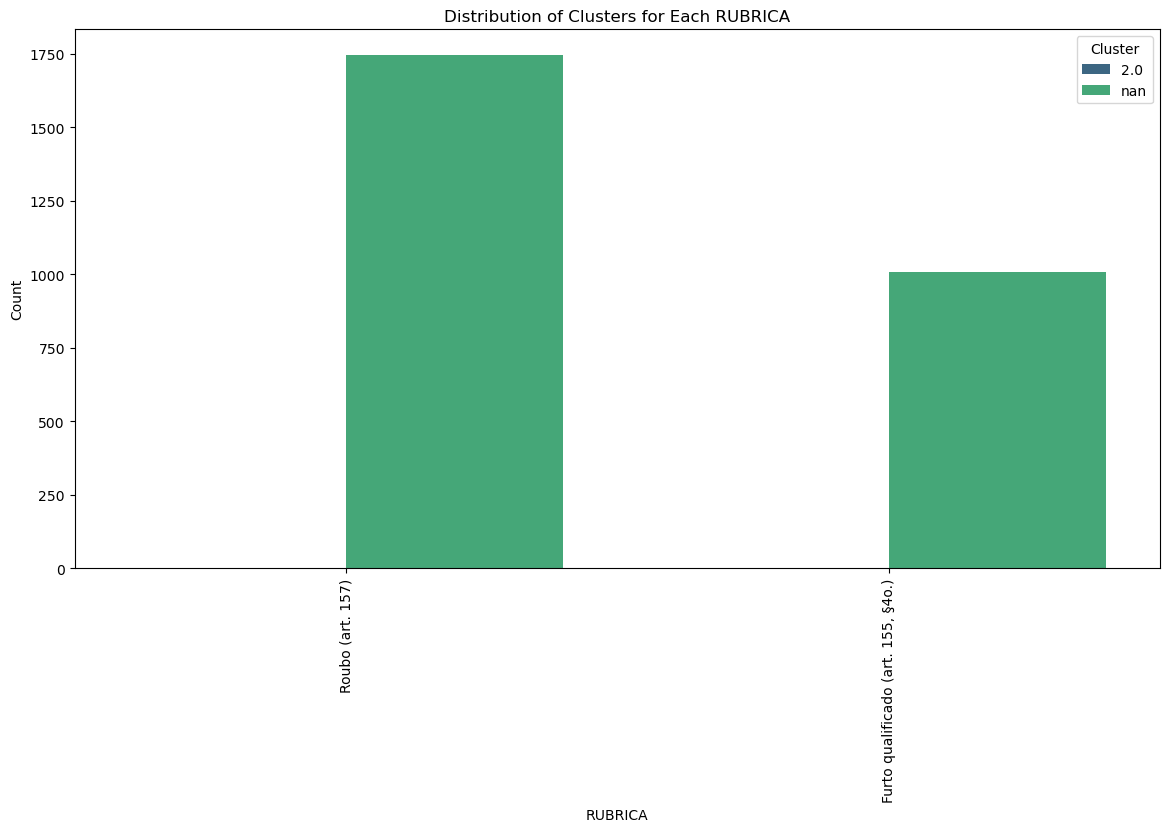

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Cluster column to string type for plotting
df['Cluster'] = df['Cluster'].astype(str)

# Plot the distribution of clusters for each RUBRICA
def plot_clusters_for_rubrica(data):
    plt.figure(figsize=(14, 7))
    sns.countplot(data=data, x='RUBRICA', hue='Cluster', palette='viridis')
    plt.title('Distribution of Clusters for Each RUBRICA')
    plt.xlabel('RUBRICA')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Cluster')
    plt.show()

plot_clusters_for_rubrica(df)


In [14]:
identity_columns = [
    'TransactionID'
    ,'id_15'
    ,'id_16'
    ,'id_35'
    ,'id_36'
    ,'id_37'
    ,'id_38'
    ,'DeviceType'
    ,'DeviceInfo'
    ,'id_31'
    ,'id_30'
    ,'id_28'
    ,'id_29'
]
df_identity = identity_dataset[identity_columns]
df_identity

,TransactionID,id_15,id_16,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,id_31,id_30,id_28,id_29
0,2987004,New,NotFound,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,samsung browser 6.2,Android 7.0,New,NotFound
1,2987008,New,NotFound,T,F,F,T,mobile,iOS Device,mobile safari 11.0,iOS 11.1.2,New,NotFound
2,2987010,Found,Found,F,F,T,T,desktop,Windows,chrome 62.0,NaN,Found,Found
3,2987011,New,NotFound,F,F,T,T,desktop,NaN,chrome 62.0,NaN,New,NotFound
4,2987016,Found,Found,T,F,T,T,desktop,MacOS,chrome 62.0,Mac OS X 10_11_6,Found,Found
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,Found,Found,F,F,T,F,mobile,F3111 Build/33.3.A.1.97,chrome 66.0 for android,NaN,Found,Found
144229,3577526,New,NotFound,T,F,T,F,mobile,A574BL Build/NMF26F,chrome 55.0 for android,Android 7.1.1,New,NotFound
144230,3577529,New,NotFound,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152,chrome 65.0 for android,NaN,New,NotFound
144231,3577531,Found,Found,T,F,T,F,desktop,MacOS,chrome 66.0,Mac OS X 10_9_5,Found,Found


In [3]:
transaction_dataset = pd.read_csv(r'../../train_transaction.csv')
print(transaction_dataset.columns)
transaction_dataset.info()

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [16]:
"""
- P_ and (R__) emaildomain: purchaser and recipient email domain
- certain transactions don't need recipient, so R_emaildomain is null.

The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) 
    and transactions posterior to it with either user account, 
    email address or billing address directly linked to these attributes as fraud too. 
    If none of above is reported and found beyond 120 days, 
    then we define as legit transaction (isFraud=0).
"""
transaction_columns = [
    'TransactionID'
    ,'isFraud'
    ,'TransactionDT'
    ,'TransactionAmt'
    ,'ProductCD'
    ,'card1'
    ,'card2'
    ,'card3'
    ,'card4'
    ,'card5'
    ,'addr1'
    ,'addr2'
    ,'P_emaildomain'
    ,'R_emaildomain'
    ,
    
]
df_transaction = transaction_dataset[transaction_columns]
df_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0
...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0


In [17]:
df_merge = df_transaction.merge(df_identity, on='TransactionID', how='left')
df_merge

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,id_31,id_30,id_28,id_29
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,samsung browser 6.2,Android 7.0,New,NotFound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
columns = ['isFraud'
    #,'TransactionDT'
    ,'ProductCD'
    ,'card4'
    ,'id_15'
    ,'id_16'
    ,'id_35'
    ,'id_36'
    ,'id_37'
    ,'id_38'
    ,'DeviceType'
    ,'DeviceInfo'
    ,'id_31'
    ,'id_30'
    ,'id_28'
    ,'id_29']

for column in columns:
    print(df_merge[column].value_counts())

isFraud
0    569877
1     20663
Name: count, dtype: int64
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64
card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: count, Length: 13553, dtype: int64
card2
321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
388.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: count, Length: 500, dtype: int64
card3
150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: count, Length: 114, dtype: int64
card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64
card5
226.0    296546
224.0     81513
166.0     57140
102.0    

In [18]:
# UserID = combinação de card1, addr1, and D1
transaction_dataset['UserID'] = transaction_dataset['card1'].astype(str) + transaction_dataset['addr1'].astype(str) + transaction_dataset['D1'].astype(str)
transaction_dataset['UserID'] = transaction_dataset['UserID'].str.replace('nan', '0').str.replace('.', '')

# Manter apenas as colunas necessárias
transaction_dataset = transaction_dataset[['UserID','TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'addr1', 'addr2', 'P_emaildomain']]

In [19]:
identity_dataset = identity_dataset[['TransactionID', 'id_30', 'id_31', 'DeviceType', 'DeviceInfo']]
identity_dataset.rename(columns={'id_30': 'SisOp', 'id_31': 'Browser'}, inplace=True)

In [20]:
# Normalizar a coluna SisOp
def normalize_sisop_column(serie):
    os_mapping = {
        'ios': 'iOS',
        'android': 'Android',
        'mac': 'Mac',
        'windows': 'Windows',
        'linux': 'Linux'
    }

    def normalize_os(value):
        value = str(value).lower()
        for key in os_mapping:
            if key in value:
                return os_mapping[key]
        return 'Other'
    
    return serie.apply(normalize_os)

identity_dataset['SisOp'] = normalize_sisop_column(identity_dataset['SisOp'])

In [21]:
# Normalizar a coluna Browser
def normalize_browser_column(serie):
    browser_mapping = {
        'chrome': 'Chrome',
        'firefox': 'Firefox',
        'safari': 'Safari',
        'ie': 'Internet Explorer',
        'edge': 'Edge',
        'samsung': 'Samsung',
        'opera': 'Opera'
    }

    def normalize_browser(value):
        value = str(value).lower()
        for key in browser_mapping:
            if key in value:
                return browser_mapping[key]
        return 'Other'
    
    return serie.apply(normalize_browser)

identity_dataset['Browser'] = normalize_browser_column(identity_dataset['Browser'])


In [22]:
# Contagem de transações por usuario
user_transactions_count = transaction_dataset.groupby('UserID').size().reset_index(name='transaction_count')
user_transactions_count.sort_values(by='transaction_count', ascending=False).head(5)

,UserID,transaction_count
88310,15885000,7198
242297,9633000,2964
150080,3154000,2897
109940,17188299000,2430
238672,9500204000,1919


In [23]:
browser_transactions_count = identity_dataset.groupby('Browser').size().reset_index(name='transaction_count')
browser_transactions_count.sort_values(by='transaction_count', ascending=False).head()

,Browser,transaction_count
0,Chrome,76059
6,Safari,37281
3,Internet Explorer,10018
2,Firefox,7017
1,Edge,6401


In [24]:
# Merge dos datasets
full_dataset = pd.merge(transaction_dataset, identity_dataset, on='TransactionID', how='inner')

In [25]:
# Tamanho dos datasets
print('Transaction Dataset:', transaction_dataset.shape)
print('Identity Dataset:', identity_dataset.shape)
print('Full Dataset:', full_dataset.shape)

Transaction Dataset: (590540, 11)
Identity Dataset: (144233, 5)
Full Dataset: (144233, 15)


In [26]:
print(f"Quantas transações fraudulentas existem no dataset mergeado?\n{full_dataset.isFraud.value_counts().sort_values(ascending=False)}")

Quantas transações fraudulentas existem no dataset mergeado?
isFraud
0    132915
1     11318
Name: count, dtype: int64
